In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [2]:
df = pd.read_csv("CL_Cup IT 2024_Сбер_dataset.csv")
df['ctl_loading_date'] = pd.to_datetime(df['ctl_loading_date'])

In [3]:
df.head()

,benchmark_id,benchmark_name,date_of,quote,ctl_loading,ctl_loading_date
0,00000000-0000-0000-0000-000000000001,Ruonia,2018-04-09,513.893595,38463471715,2018-04-09
1,005F4F7B-D562-4B0F-BDC9-EB892065A955,RUGBITR1Y,2018-04-09,153.916680,38463471715,2018-04-09
2,03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1,50%RUCBITRBB3Y + 50%RUCBITRBBB3Y,2018-04-09,48.649655,38463471715,2018-04-09
3,050C195A-1D74-402F-B36D-63CA40AFE789,60% RUGBITR1Y+40% RUONIA Index,2018-04-09,277.774791,38463471715,2018-04-09
4,050C195A-1D74-402F-B36D-63CA40AFE789,60% RUGBITR1Y+40% RUONIA Index,2018-04-09,277.774791,38463471715,2018-04-09


In [4]:
grouped = df.groupby('ctl_loading')['benchmark_id'].apply(list).reset_index()

In [5]:
date = df['ctl_loading_date']
df['hour'] = date.dt.hour
df['dayofweek'] = date.dt.dayofweek
df['quarter'] = date.dt.quarter
df['month'] = date.dt.month
df['year'] = date.dt.year
df['dayofyear'] = date.dt.dayofyear
df['dayofmonth'] = date.dt.day
df['weekofyear'] = date.dt.isocalendar().week

In [6]:
X = df.drop(columns = ['benchmark_id', 'benchmark_name', 'date_of', 'quote'])
X = X.drop_duplicates()

In [7]:
X = pd.merge(X, grouped, on = 'ctl_loading')

In [8]:
X['num_bench'] = X['benchmark_id'].apply(len)
X['num_bench_unique'] = X['benchmark_id'].apply(set).apply(len)

In [9]:
def count_benchmark_ids(benchmark_ids):
    all_ids = [item for sublist in benchmark_ids for item in sublist]
    return pd.Series(all_ids).value_counts()

benchmark_counts = count_benchmark_ids(X["benchmark_id"])
for benchmark_id in benchmark_counts.index:
    X[benchmark_id] = 0

for i, row in X.iterrows():
    for benchmark_id in row["benchmark_id"]:
        X.at[i, benchmark_id] += 1
X.drop(columns=['benchmark_id'], inplace = True)
None

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_3924\1799052945.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[benchmark_id] = 0
C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_3924\1799052945.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[benchmark_id] = 0
C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_3924\1799052945.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

In [10]:
def is_weekend(x):
    return int(x > 4)
X['is_weekend'] = X['dayofweek'].apply(is_weekend)

C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_3924\280270727.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['is_weekend'] = X['dayofweek'].apply(is_weekend)


In [11]:
X.shape

(2295, 529)

In [12]:
Q1 = X['num_bench'].quantile(0.25)
Q3 = X['num_bench'].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print([lower, upper]) 

[403.5, 503.5]


## Посмотрим на выбросы

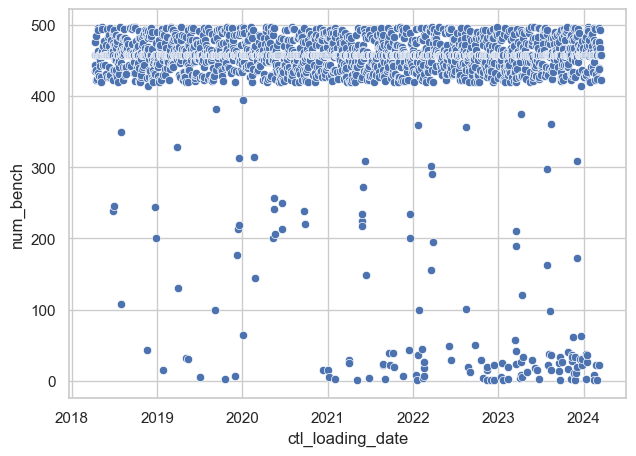

In [13]:
sns.set(style="whitegrid")
sns.scatterplot(data = X, x = 'ctl_loading_date', y = 'num_bench')
plt.show()

In [14]:
X['weekofyear'] = X['weekofyear'].astype('int32')

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Columns: 529 entries, ctl_loading to is_weekend
dtypes: datetime64[ns](1), int32(8), int64(520)
memory usage: 9.2 MB


Экспортируем данные для ручной разметки

In [16]:
X.to_csv('transformed_df.csv', index = False)

## Загружаем размеченные данные

In [17]:
new_X = pd.read_csv("transformed_target_df.csv", delimiter=";")

Выделим признаки для модели

In [18]:
new_X.columns

Index(['ctl_loading', 'ctl_loading_date', 'hour', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
       ...
       '050C195A-1D74-402F-B36D-63CA40AFE789',
       '07B0BD6C-1819-4488-B0C6-C4099EDCD29D',
       '070B1DF3-5251-46A3-B706-B693B7148BC8',
       '0532FCD2-5A26-4ED7-83C1-F482BE949312',
       '03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1',
       '005F4F7B-D562-4B0F-BDC9-EB892065A955',
       '00000000-0000-0000-0000-000000000001', 'is_weekend', 'is_fixed',
       'new_target'],
      dtype='object', length=531)

## Train/Test Split

In [19]:
train = new_X.loc[new_X.ctl_loading_date < '04.01.2023']
test = new_X.loc[new_X.ctl_loading_date >= '04.01.2023']

In [20]:
y_train = train["new_target"]
ans_train = train["new_target"]
X_train = train.drop(columns=['ctl_loading', 'ctl_loading_date', 'new_target'])

y_test = test["new_target"]
ans_test = test["new_target"]
X_test = test.drop(columns=['ctl_loading', 'ctl_loading_date', 'new_target'])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score

In [22]:
mtf = StandardScaler()
mtf.fit_transform(X_train)
mtf.fit_transform(X_test)

predicts_auc = []
predicts_f1 = []

# X_ans = X_test.iloc[-1,:]
# y_ans = y_test.iloc[-1]
# X_test = X_test.iloc[:-1, :]
# y_test = y_test.iloc[:-1]

## KNN Classifier

In [23]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicts_auc.append(roc_auc_score(y_pred, y_test))
predicts_f1.append(f1_score(y_pred, y_test))
print(predicts_auc[-1])

0.9534962661235573


## Log Reg

In [24]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicts_auc.append(roc_auc_score(y_pred, y_test))
predicts_f1.append(f1_score(y_pred, y_test))
fin_w = model.coef_
fin_hyp = model.C_
print(predicts_auc[-1])
print(fin_hyp)


C:\Users\vctrvnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9849290060851926
[0.0001]


## Desicion Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='log_loss',
                              splitter='random',
                              max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicts_auc.append(roc_auc_score(y_pred, y_test))
predicts_f1.append(f1_score(y_pred, y_test))
print(predicts_auc[-1])

0.9635101755306358


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='log_loss',
                              n_estimators=5,
                              max_depth = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicts_auc.append(roc_auc_score(y_pred, y_test))
predicts_f1.append(f1_score(y_pred, y_test))
print(predicts_auc[-1])

0.979591836734694


C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_3924\2122984937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(x='Модели', y='Метрика', data=df_demo, palette='viridis')
C:\Users\vctrvnn\AppData\Local\Temp\ipykernel_3924\2122984937.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(x='Модели', y='Метрика', data=df_demo2, palette='viridis')


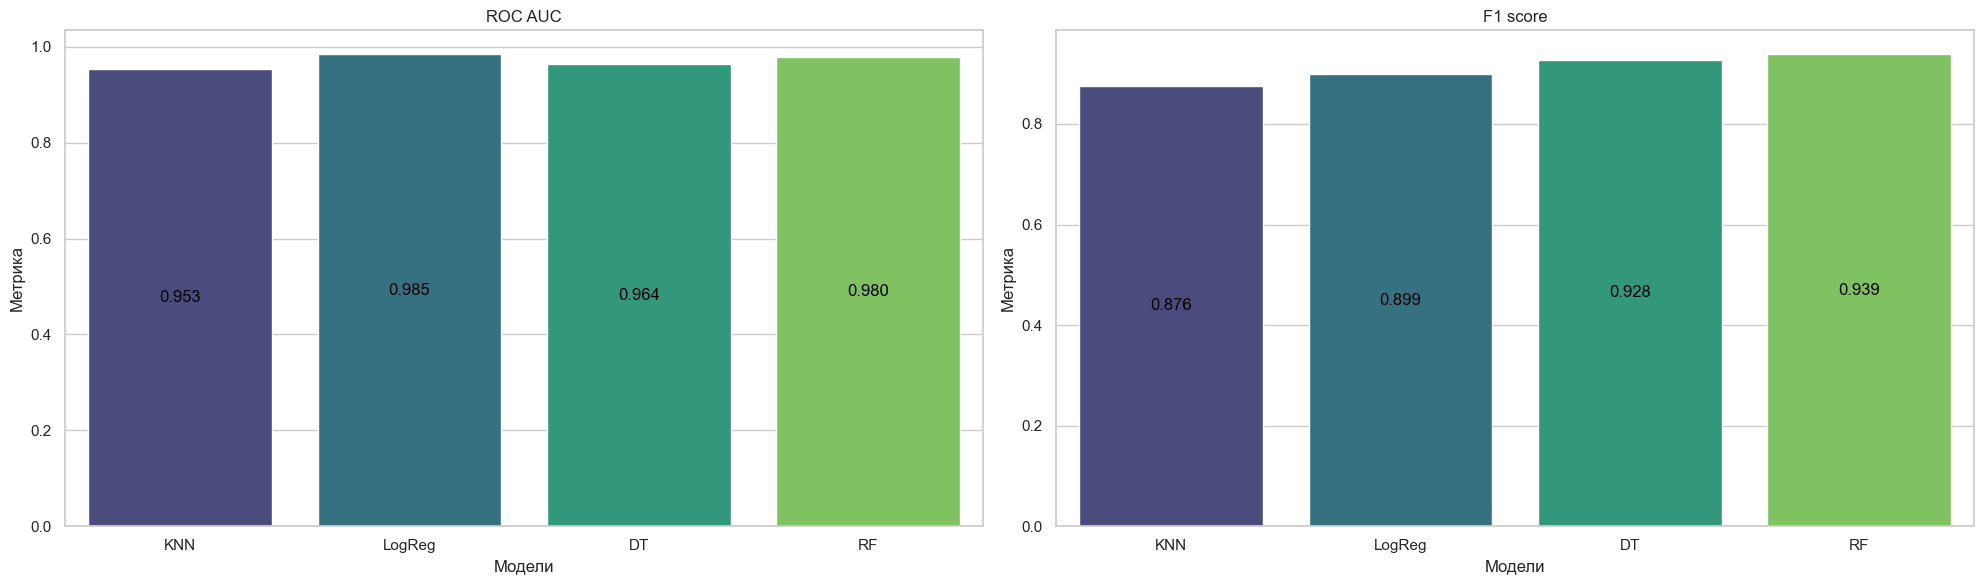

In [29]:
plt.figure(figsize=(20, 6))

data1 = {
    'Модели': ['KNN', 'LogReg', 'DT', 'RF'],
    'Метрика': predicts_auc
}
data2 = {
    'Модели': ['KNN', 'LogReg', 'DT', 'RF'],
    'Метрика': predicts_f1
}

df_demo = pd.DataFrame(data1)
df_demo2 = pd.DataFrame(data2)


plt.subplot(1, 2, 1) 
barplot1 = sns.barplot(x='Модели', y='Метрика', data=df_demo, palette='viridis')
barplot1.set_title('ROC AUC')
for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                      ha = 'center', va = 'center', 
                      color='black')


plt.subplot(1, 2, 2) 
barplot2 = sns.barplot(x='Модели', y='Метрика', data=df_demo2, palette='viridis')
barplot2.set_title('F1 score')
for p in barplot2.patches:
    barplot2.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                      ha = 'center', va = 'center', 
                      color='black')

plt.tight_layout()  # This will ensure the plots do not overlap
plt.show()

In [30]:
mean_abs_weights = np.mean(np.abs(fin_w), axis=0)
top_20_indices = np.argsort(mean_abs_weights)[-10:]
top_20_indices = top_20_indices[::-1]
top_20_indices = list(top_20_indices)
top_20_indices

In [32]:
mean_abs_weights[top_20_indices]

array([1.11911065e-02, 1.00200222e-02, 4.17797175e-03, 1.22639858e-03,
       1.11058079e-03, 1.47598969e-04, 1.46543163e-04, 1.31777718e-04,
       1.14819938e-04, 9.14733031e-05])

In [40]:
X_train.columns[top_20_indices]

Index(['num_bench', 'num_bench_unique', 'dayofyear', 'weekofyear', 'year',
       '46CBA86E-0269-4219-88C8-AE52B4CCD142', 'dayofweek', 'month',
       'dayofmonth', '5CB2D037-903B-4A02-BB38-C2AD62AA0E20'],
      dtype='object')

In [3]:
s = 0
for i in range(1, 1001):
    s += i ** 2 / 500500
print(s)
    

667.0000000000003


In [6]:
s = 0
for i in range(1000, 0, -1):
    s += (1000 - i + 1) / i
s

6492.956331410896